# Videojuegos exitosos

## Índice <a id='back'></a>
* [Introducción](#intro)
* [Etapa 1. Descripción y preprocesamiento de los datos](#data_review)
    * [1.1. Duplicados](#data_review_duplicated)
        * [1.1.1. Columna `'platform'`](#data_review_duplicated_platform)
        * [1.1.2. Columna `'genre'`](#data_review_duplicated_genre)
        * [1.1.3. Columna `'user_score'`](#data_review_duplicated_userscore)
        * [1.1.4. Columna `'rating'`](#data_review_duplicated_rating)
        * [1.1.5. Columna `'name'`](#data_review_duplicated_name)
    * [1.2. Valores ausentes](#data_review_missing)
        * [1.2.1. Columna `'year_of_release'`](#data_review_missing_year)
        * [1.2.2. Columna `'critic_score'`](#data_review_missing_criticscore)
        * [1.2.3. Columna `'user_score'`](#data_review_missing_userscore)
    * [1.3. Conclusiones](#data_review_conclusions)
* [Etapa 2. Análisis exploratorio de datos](#data_analysis)
    * [2.1. Las consolas más populares](#data_analysis_popplats)
    * [2.2. Las consolas más rentables](#data_analysis_salesplat)
    * [2.3. Puntuación y ventas](#data_analysis_rating)
    * [2.4. Género y ventas](#data_analysis_genre)
    * [2.5. Perfil de usuario por región](#data_analysis_area)
    * [2.6. Conclusiones](#data_analysis_conclusions)
* [Etapa 4. Comprobación de hipótesis](#data_hypothesis)
    * [4.1. Puntuaciones y consolas](#data_hypothesis_platform)
    * [4.2. Puntuaciones y género](#data_hypothesis_genre)
* [Etapa 5. Conclusión general](#data_conclusion)

## Introducción <a id='intro'></a>

Este proyecto es realizado para la tienda online Ice, la cual vende videojuegos por todo el mundo. Se cuenta con datos del año 2016.

**Objetivo e Hipótesis**

El objetivo es identificar patrones para determinar si un juego tiene éxito o no. Se establecen dos hipótesis:
1. Las puntuaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.

**Etapas**
Los datos se almacenan en el archivo `/datasets/games.csv`. No hay ninguna información sobre la calidad de los datos así que se examinarán antes de probar las hipótesis.

Primero, se evaluará la calidad de los datos y si los problemas son significativos, entonces, durante el preprocesamiento de datos, se tomará en cuenta los problemas más críticos. Finalmente se comprobarán las hipótesis para presentar las conclusiones.
 
El proyecto consistirá en cuatro etapas:
 1. Descripción y preprocesamiento de los datos.
 2. Análisis exploratorio de los datos.
 3. Comprobación de hipótesis.
 4. Conclusión general.

[Volver a Contenidos](#back)

## Etapa 1. Descripción y preprocesamiento de los datos <a id='data_review'></a>

Se importan las librerías necesarias.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats as st
from math import ceil, factorial

Se lee el archivo y se guarda en la variable `df`.

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

Se imprime la información general y las primeras 10 filas.

In [3]:
df.info()
print()
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart

La tabla cuenta con 16,715 filas y 11 columnas, las cuales son:

1. `'Name'` - Título del videojuego.
2. `'Platform'` - Consola o pltaforma del videojuego.
3. `'Year_of_Release'` - Año de lanzamiento del videojuego.
4. `'Genre'` - Género del videojuego.
5. `'NA_sales'` - ventas en Norteamérica, en millones de dólares estadounidenses.
6. `'EU_sales'` - ventas en Europa, en millones de dólares estadounidenses.
7. `'JP_sales'` - ventas en Japón, en millones de dólares estadounidenses.
8. `'Other_sales'` - ventas en otras regiones, en millones de dólares estadounidenses.
9. `'Critic_Score'` - puntuación según la crítica (máximo 100).
10. `'User_Score'` - puntuación según los usuarios (máximo 10).
11. `'Rating'` - clasificación ESRB.

Existen valores ausentes en las columnas `'Name'`, `'Year_of_Release'`, `'genre'`, `'Critic_Score'`, `'User_Score'`y `'Rating'`. Se investigará más sobre cada una de ellas. Los nombres de las columnas usan letras mayúsculas y minúsculas, se cambiarán por minúsculas todas las letras.

Se imprimirán los títulos de las columnas en busca de problemas más sútiles.

In [4]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


El único detalle es el uso de mayúsculas y minúsculas. Se cambian a minúsculas todas las letras.

In [5]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


[Volver a Contenidos](#back)

### 1. 1. Duplicados <a id='data_review_duplicated'></a>

En esta sección se tratarán las columnas de tipo object, principalmente para analizar si existen duplicados.

#### 1.1.1 Columna `'platform'` <a id='data_review_duplicated_platform'></a>

La columna `'platform'` no contiene valores ausentes. Se imprimirá la lista de valores únicos para determinar si existen duplicados implícitos.

In [6]:
df['platform'] = df['platform'].str.lower() #convertimos a minúsculas los datos de la columna
print(df['platform'].sort_values().unique())

['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']


Se tienen las siguientes consolas:
* `'2600'` - Atari 2600.
* `'3do'` - 3DO Interactive Multiplayer.
* `'3ds'` - Nintendo 3DS.
* `'dc'` - Sega Dreamcast.
* `'ds'` - Nintendo DS.
* `'gb'` - Nintendo Game Boy.
* `'gba'` - Nintendo Game Boy Advance.
* `'gc'` - Nintendo GameCube.
* `'gen'`- Sega Genesis.
* `'gg'` - Sega Game Gear.
* `'n64'` - Nintendo 64.
* `'nes'` - Nintendo.
* `'ng'` - Neo Geo.
* `'pc'` - Plataforma.
* `'pcfx'` - NEC PC-FX.
* `'ps'` - PlayStation.
* `'ps2'` - PlayStation 2.
* `'ps3'` - PlayStation 3.
* `'ps4'` - PlayStation 4.
* `'psp'` - PlayStation Portable.
* `'psv'` - PlatStation Vita.
* `'sat'` - Sega Saturn.
* `'scd'` - Sega CD.
* `'snes'` - Super Nintendo.
* `'tg16'` - PC Engine.
* `'wii'` - Nintendo Wii.
* `'wiiu'` - Nintendo Wii U.
* `'ws'` - WonderSwan.
* `'x360'` - Xbox 360.
* `'xb'` - Xbox.
* `'xone'` - Xbox One.

No existen duplicados implícitos.

[Volver a Contenidos](#back)

#### 1.1.2 Columna `'genre'` <a id='data_review_duplicated_genre'></a>

La columna `'genre'` contiene dos valores ausentes los cuales pueden deberse a un error en el proceso de recopilación de datos. Se imprimirán estas dos filas para investigación.

In [7]:
print(df[df['genre'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Estas filas también contienen los dos valores ausentes de la columna `'name'`. Como sólo son 2 filas de 16,715 y además no hay forma de conocer a qué videjuego pertenecen, se decide eliminarlas.

In [8]:
df = df.dropna(subset='genre')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se imprimirá la lista de valores únicos de la columna `'genre'`.

In [9]:
df['genre'] = df['genre'].str.lower() #convertimos a minúsculas todos los datos de esta columna
print(df['genre'].sort_values().unique())

['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']


No existen duplicados implícitos.

[Volver a Contenidos](#back)

#### 1.1.3 Columna `'user_score'` <a id='data_review_duplicated_userscore'></a>

Esta columna contiene valores ausentes, los cuales serán tratados más adelante. Además, sus datos deberían ser numéricos, sin embargo aparecen como tipo object. Se mostrarán sus valores únicos para investigación. 

In [10]:
print(df['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


El único valor que no es numérico es `'tbd'` (to be determined), esto significa que el videojuego aún no ha sido puntuado. Así, este valor es como si se tuviera un valor ausente pues se desconoce la razón por la que el videojuego no ha diso puntuado. Se reemplazará por NaN.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', float('nan'))
df['user_score'] = df['user_score'].astype('float64') #convertimos los datos de la columna tipo float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


[Volver a Contenidos](#back)

#### 1.1.4 Columna `'rating'` <a id='data_review_duplicated_rating'></a>

Análogamente a las columnas anteriores, se convertirán las letras de los datos a minúsculas y se imprimirán los valores únicos.

In [12]:
df['rating'] = df['rating'].str.lower()
print(df['rating'].sort_values().unique())

['ao' 'e' 'e10+' 'ec' 'k-a' 'm' 'rp' 't' nan]


Las clasificaciones existentes de acuerdo a The Entertainment Software Rating Board (ESRB) son:

1. `'ao'` - Sólo adultos (mayores de 18 años).
2. `'e'` - Apto para todas las edades.
3. `'e10+'` - Apto para mayores de 10 años.
4. `'ec'` - Apto para niños pequeños.
5. `'k-a'`- Niños y adultos, esta clasificación es la misma que `'e'` pero fue usada antes del año 1998.
6. `'m'` - Apto para mayores de 17 años (la diferencia con `'ao'` es que contienen menos escenas o de menor duración cuyo contenido sea sexual o de violencia).
7. `'rp'` - Indica que la clasificación está pendiente.
8. `'t'` - Apto para mayores de 13 años.

Los valores ausentes se tratarán más adelante. Se reemplazará la clasificación `'k-a'` por `'e'` ya que indican la misma información.

In [13]:
df['rating'] = df['rating'].replace('k-a', 'e')
print(df['rating'].sort_values().unique())
print()
df.info()

['ao' 'e' 'e10+' 'ec' 'm' 'rp' 't' nan]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


[Volver a Contenidos](#back)

#### 1.1.5 Columna `'name'` <a id='data_review_duplicated_name'></a>

La columna `'name'` no contiene valores ausentes. Puede haber duplicados implícitos por el uso de mayúsculas y minúsculas, o bien, que los títulos comiencen con espacios en blanco. Esto es lo primero que se tratará.

In [14]:
df['name'] = df['name'].str.lower().str.strip()#convertimos a minúsculas los datos y quitamos espacios en blanco al incio o final
print(len(df['name'].sort_values().unique())) #cantidad de valores únicos
print()
print(df.head(10))

11559

                        name platform  year_of_release         genre  \
0                 wii sports      wii           2006.0        sports   
1          super mario bros.      nes           1985.0      platform   
2             mario kart wii      wii           2008.0        racing   
3          wii sports resort      wii           2009.0        sports   
4   pokemon red/pokemon blue       gb           1996.0  role-playing   
5                     tetris       gb           1989.0        puzzle   
6      new super mario bros.       ds           2006.0      platform   
7                   wii play      wii           2006.0          misc   
8  new super mario bros. wii      wii           2009.0      platform   
9                  duck hunt      nes           1984.0       shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     41.36     28.96      3.77         8.45          76.0         8.0      e  
1     29.08      3.58      6.81         

Al observar las filas 6 y 8, se tiene que se trata del mismo título pero para consolas distintas. El título de la fila 8 contiene el nombre de la consola a la que pertenece. Pueden existir más casos como este.

In [15]:
def delete_platform(row):#función para eliminar la plataforma del título si es que coincide con la columna de plataforma
    name = str(row['name'])
    platform = str(row['platform'])
    platform_end = platform.rjust(len(platform)+1) #agregar un espacio en blanco al incio
    platform_start = platform.ljust(len(platform)+1) #agregar un espacio en blanco al final
    if re.search(platform_start, name): #elimina la plataforma si el título comienza con ella
        name = name.strip(platform_start)
        return name
    elif re.search(platform_end, name): #elimina la plataforma si el título termina con ella
        name = name.strip(platform_end)
        return name
    else:
        return name

In [16]:
df_test = pd.DataFrame() #DataFrame de prueba
df_test['name'] = ['sports wii', 'wii-sports', 'g33ds', '3ds fifa']
df_test['platform'] = ['wii', 'wii', '3ds', '3ds']
print(df_test)
print()
df_test['name'] = df_test.apply(delete_platform, axis=1) #se aplica la función al DataFrame de prueba
print(df_test)

         name platform
0  sports wii      wii
1  wii-sports      wii
2       g33ds      3ds
3    3ds fifa      3ds

         name platform
0      sports      wii
1  wii-sports      wii
2       g33ds      3ds
3        fifa      3ds


In [17]:
df['name'] = df.apply(delete_platform, axis=1) #aplicamos la función a df
print(df.head(10))

                       name platform  year_of_release         genre  na_sales  \
0                    sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2                mario kart      wii           2008.0        racing     15.68   
3             sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   
5                    tetris       gb           1989.0        puzzle     23.20   
6     new super mario bros.       ds           2006.0      platform     11.28   
7                      play      wii           2006.0          misc     13.96   
8     new super mario bros.      wii           2009.0      platform     14.44   
9                 duck hunt      nes           1984.0       shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45    

In [18]:
print(df['name'].sort_values().head(20)) #imprimimos los primeros 20 valores de esta columna (ordenados alfabeticamente)

4728                                     '98 koshien
8342                      .hack//g.u. vol.1//rebirth
7087                    .hack//g.u. vol.2//reminisce
8597         .hack//g.u. vol.2//reminisce (jp sales)
8293                   .hack//g.u. vol.3//redemption
1561                         .hack//infection part 1
9063                                     .hack//link
2990                          .hack//mutation part 2
4265                          .hack//outbreak part 3
7992     .hack//quarantine part 4: the final chapter
14329              .hack: sekai no mukou ni + versus
3757                                      007 racing
4475                          007: quantum of solace
14658                         007: quantum of solace
1285                          007: quantum of solace
9507                          007: quantum of solace
1785                          007: quantum of solace
3120                          007: quantum of solace
2243                    007: the world is not 

Se oberva que la fila 7087 y 8597 parecen ser el mismo videojuego salvo por `'(jp sales)'`. Se imprimiran las dos filas para investigación.

In [19]:
for number in [7087, 8597]:
    print(df.loc[number])

name               .hack//g.u. vol.2//reminisce
platform                                    ps2
year_of_release                          2006.0
genre                              role-playing
na_sales                                   0.11
eu_sales                                   0.09
jp_sales                                    0.0
other_sales                                0.03
critic_score                                NaN
user_score                                  NaN
rating                                      NaN
Name: 7087, dtype: object
name               .hack//g.u. vol.2//reminisce (jp sales)
platform                                               ps2
year_of_release                                     2006.0
genre                                         role-playing
na_sales                                               0.0
eu_sales                                               0.0
jp_sales                                              0.16
other_sales                      

Los datos que no son sobre las ventas coinciden y en las ventas la diferencia es que el videojuego etiquetado con `'(jp sales)'` registra únicamente las ventas de Japón.

In [20]:
name_sales = df[df['name'].str.contains('sales')] #filtra la tabla solamente con las filas que contienen sales en la columna name
print(name_sales['name'].sort_values().unique())

['.hack//g.u. vol.2//reminisce (jp sales)' 'ape escape academy (jp sales)'
 'atelier iris 3: grand phantasm (jp sales)'
 'atelier iris 3: grand phantasm (us sales)'
 'battlefield 2: modern combat(jp sales)' 'bleach: dark souls (jp sales)'
 'bomberman (jp sales)' 'brave story: new traveler (us sales)'
 'brave story: new traveller (jp sales)'
 'chou-kuukan night pro yakyuu king (weekly jp sales)'
 'chou-kuukan night pro yakyuu king(higher jp sales)'
 'dance dance revolution: mario mix (jp sales)' 'draglade (jp sales)'
 'dragon ball z: budokai tenkaichi 2 (jp sales)'
 'dragon ball z: harukanaru densetsu (jp sales)'
 'dragon ball: origins (jp & incomplete us sales)'
 'dynasty warriors 6 (jp sales)' 'dynasty warriors vol. 2 (jp sales)'
 'earth defense force 2017 (old jp sales)' 'enchanted arms (jp sales)'
 'eternal poison (jp sales)'
 'fatal fury: battle archives volume 1 (jp sales)'
 'fatal fury: battle archives volume 2 (jp sales)'
 'fifa soccer 2003 (weekly jp sales)' 'fishing master (jp

Se oberva que varios títulos contienen entre paréntesis las ventas de alguna o más regiones pero también, existen 3 que contienen más información:
1. `'lunar 2: eternal blue(sales, but wrong system)'`.
2. `'pachi-slot teiou: golgo 13 las vegas (jp sales, but wrong system)'`.
3. `'r-type command (correct us sales)'`.

Se imprimirán las filas que contienen `'lunar 2: eternal blue'` para investigación.

In [21]:
print(df[df['name'].str.contains('lunar 2: eternal blue')])

                                                name platform  \
5331                  lunar 2: eternal blue complete       ps   
9000  lunar 2: eternal blue(sales, but wrong system)      gen   
9961                           lunar 2: eternal blue      sat   

      year_of_release         genre  na_sales  eu_sales  jp_sales  \
5331           1999.0  role-playing      0.19      0.13      0.00   
9000           1994.0  role-playing      0.00      0.00      0.14   
9961           1998.0  role-playing      0.00      0.00      0.12   

      other_sales  critic_score  user_score rating  
5331         0.02          86.0         8.9      t  
9000         0.00           NaN         NaN    NaN  
9961         0.00           NaN         NaN    NaN  


Son tres filas, con años distintos, esto tiene sentido porque fue lanzado para diferentes consolas. Buscando información, el videojuego del año 1994, fue lanzado para Sega CD (scd) y no para Sega Genesis (gen).

In [22]:
df.loc[9000, 'platform'] = 'scd' #corregimos la consola
print(df.loc[9000])

name               lunar 2: eternal blue(sales, but wrong system)
platform                                                      scd
year_of_release                                            1994.0
genre                                                role-playing
na_sales                                                      0.0
eu_sales                                                      0.0
jp_sales                                                     0.14
other_sales                                                   0.0
critic_score                                                  NaN
user_score                                                    NaN
rating                                                        NaN
Name: 9000, dtype: object


Ahora se imprimirán las filas que contienen `'pachi-slot teiou: golgo 13 las vegas'` para investigación.

In [23]:
print(df[df['name'].str.contains('pachi-slot teiou: golgo 13 las vegas')])

                                                    name platform  \
16153  pachi-slot teiou: golgo 13 las vegas (jp sales...      ps2   

       year_of_release genre  na_sales  eu_sales  jp_sales  other_sales  \
16153           2002.0  misc       0.0       0.0      0.01          0.0   

       critic_score  user_score rating  
16153           NaN         NaN    NaN  


Es una única fila y según la información buscada este videojuego fue lanzado para la consola PlayStation (ps).

In [24]:
df.loc[16153, 'platform'] = 'ps' #corregimos plataforma
print(df.loc[16153])

name               pachi-slot teiou: golgo 13 las vegas (jp sales...
platform                                                          ps
year_of_release                                               2002.0
genre                                                           misc
na_sales                                                         0.0
eu_sales                                                         0.0
jp_sales                                                        0.01
other_sales                                                      0.0
critic_score                                                     NaN
user_score                                                       NaN
rating                                                           NaN
Name: 16153, dtype: object


Se buscarán las filas que contienen `'r-type command'` para información.

In [25]:
print(df[df['name'].str.contains('r-type command')])

                                    name platform  year_of_release     genre  \
11956                     r-type command      psp           2007.0  strategy   
13946  r-type command (correct us sales)      psp           2007.0  strategy   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
11956      0.05       0.0      0.01         0.01          69.0         6.5   
13946      0.04       0.0      0.00         0.00           NaN         NaN   

      rating  
11956   e10+  
13946    NaN  


Únicamente son dos filas, el mensaje entre paréntesis indica que es el dato correcto de las ventas en Norte América.

In [26]:
df.loc[11956, 'na_sales'] = 0.04 #corregimos na_sales
print(df.loc[11956])

name               r-type command
platform                      psp
year_of_release            2007.0
genre                    strategy
na_sales                     0.04
eu_sales                      0.0
jp_sales                     0.01
other_sales                  0.01
critic_score                 69.0
user_score                    6.5
rating                       e10+
Name: 11956, dtype: object


In [27]:
df = df.drop(index=13946) #eliminamos fila
print(df[df['name'].str.contains('r-type command')])

                 name platform  year_of_release     genre  na_sales  eu_sales  \
11956  r-type command      psp           2007.0  strategy      0.04       0.0   

       jp_sales  other_sales  critic_score  user_score rating  
11956      0.01         0.01          69.0         6.5   e10+  


Se eliminarán los mensajes entre paréntesis que se encontraron de los títulos de los videojuegos.

In [28]:
sales_list = ['(jp sales)', '(us sales)', '(weekly jp sales)', '(higher jp sales)', '(jp & incomplete us sales)',
              '(old jp sales)', '(others sales)', '(american sales)', '(all region sales)', '(jp weekly sales)',
              '(america weekly sales)', '(weekly american sales)', '(us weekly sales)', '(old us sales)',
              '(old all region sales)', '(us & others sales)', '(jp & others sales)', '(japan sales)',
              '(american and others sales)', '(sales, but wrong system)', '(jp sales, but wrong system)', '(all regions sales)']

In [29]:
def delete_word(string, word): #función que evalua si el segundo argumento está en el primero
    if word in string:
        string = string.replace(word, '') #remueve el segundo argumento del primero
        string = string.strip()
        return string
    else:
        return string
    
def name_replace(string): #función que elimina el elemento de la lista del título (en caso de contenerlo)
    for sale in sales_list: #recorre los elementos de la lista
        string = delete_word(string, sale) #evalua la primera función para el elemento correspondiente del bucle
    return string

In [30]:
df_test = pd.DataFrame() #DataFrame de prueba
df_test['name'] = ['game 1 (jp sales)', 'g2 us sales', 'g3(jp weekly sales)', 'g4']
df_test['year'] = [2004, 2005, 2006, 2007]
print(df_test)
print()
df_test['name'] = df_test['name'].apply(name_replace) #se aplica la función al DataFrame de prueba
print(df_test)

                  name  year
0    game 1 (jp sales)  2004
1          g2 us sales  2005
2  g3(jp weekly sales)  2006
3                   g4  2007

          name  year
0       game 1  2004
1  g2 us sales  2005
2           g3  2006
3           g4  2007


In [31]:
df['name'] = df['name'].apply(name_replace) #se aplica la función a df
df['name'] = df['name'].str.strip() #se eliminan espacios en blanco al inicio o final del título (de existir)
print(df[df['name'].str.contains('sales')]) #se verifica que no existan más títulos con la palabra sales

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Se han eliminado los elementos de la lista que se creó. Se imprimirá nuevamente la longitud de los valores únicos en la colunmna `'name'`.

In [32]:
print(len(df['name'].sort_values().unique()))

11418


Esto indica la posibilidad que existan títulos con mensajes entre paréntesis, los cuales pueden contener información sobre los datos de las otras columnas.

In [33]:
name_extra = df[df['name'].str.endswith(')')] #filtramos la tabla con las filas cuyo título termina con )
print(name_extra['name'].sort_values().unique())

['attack on titan (koei)' 'blood: the last vampire (joukan)'
 "cabela's big game hunter (2008)" "cabela's outdoor adventures (2006)"
 "cabela's outdoor adventures (2009)" 'dance dance revolution (japan)'
 'dance dance revolution (north america)' 'doom (2016)'
 'f1 2016 (codemasters)' 'fuse (insomniac)' 'gadget racers (pal)'
 'gallop racer (jp)' 'game of thrones (telltale)' 'ghostbusters (2016)'
 'ghostbusters: the video game (ds version)' 'godzilla (2014)'
 'godzilla (2015)' 'goldeneye 007 (2010)' 'gran turismo (psp)'
 'hajime no ippo: the fighting! (2014)' 'hitman (2016)'
 'jampack spring 2004 (rp-t)' 'jampack volume 13 (rp-m)'
 'jampack volume 13 (rp-t)' 'jampack volume 14 (rp-t)'
 'jampack winter 2003 (rp-m)' 'jampack winter 2003 (rp-t)'
 'jampack: summer 2003 (rp-m)' 'jampack: summer 2003 (rp-t)'
 'killer instinct (2013)' 'kimikiss (ebkore+)' "king's field (japan)"
 'mad max (2015)' 'motor toon grand prix (japan)' 'need for speed (2015)'
 "nobunaga's ambition (3ds)" 'prince of pers

Algunos contienen las consolas de lanzamiento nuevamente pero ahora entre paréntesis. Se eliminará esta información de los títulos.

In [34]:
name_platform =['(ds version)', '(ds versions)', '(psp)', '(3ds)', '(cd)', '(ps1 & psp versions)', '(console version)',
                '(ds & mobile versions)', '(wii & ps2 version)', '(xbox 360, ps3, & pc versions)',
                '(xbox 360, ps2, ps3, wii & pc versions)', '(gbc)']

In [35]:
def name_plat(string): #función que elimina el elemento de la lista del título (en caso de contenerlo)
    for plat in name_platform: #recorre los elementos de la lista
        string = delete_word(string, plat) #evalua la primera función para el elemento correspondiente del bucle
    return string

In [36]:
df_test = pd.DataFrame() #DataFrame de prueba
df_test['name'] = ['game 1 (ds version)', 'g2 psp', 'g3(3ds)', 'g4']
df_test['year'] = [2004, 2005, 2006, 2007]
print(df_test)
print()
df_test['name'] = df_test['name'].apply(name_plat) #se aplica la función al DataFrame de prueba
print(df_test)

                  name  year
0  game 1 (ds version)  2004
1               g2 psp  2005
2              g3(3ds)  2006
3                   g4  2007

     name  year
0  game 1  2004
1  g2 psp  2005
2      g3  2006
3      g4  2007


In [37]:
df['name'] = df['name'].apply(name_plat) #aplicamos la función a df
print(len(df['name'].sort_values().unique()))

11406


In [38]:
name_extra = df[df['name'].str.endswith(')')] #filtramos nuevamente la tabla con las filas cuyo título termina con )
print(name_extra['name'].sort_values().unique())

['attack on titan (koei)' 'blood: the last vampire (joukan)'
 "cabela's big game hunter (2008)" "cabela's outdoor adventures (2006)"
 "cabela's outdoor adventures (2009)" 'dance dance revolution (japan)'
 'dance dance revolution (north america)' 'doom (2016)'
 'f1 2016 (codemasters)' 'fuse (insomniac)' 'gadget racers (pal)'
 'gallop racer (jp)' 'game of thrones (telltale)' 'ghostbusters (2016)'
 'godzilla (2014)' 'godzilla (2015)' 'goldeneye 007 (2010)'
 'hajime no ippo: the fighting! (2014)' 'hitman (2016)'
 'jampack spring 2004 (rp-t)' 'jampack volume 13 (rp-m)'
 'jampack volume 13 (rp-t)' 'jampack volume 14 (rp-t)'
 'jampack winter 2003 (rp-m)' 'jampack winter 2003 (rp-t)'
 'jampack: summer 2003 (rp-m)' 'jampack: summer 2003 (rp-t)'
 'killer instinct (2013)' 'kimikiss (ebkore+)' "king's field (japan)"
 'mad max (2015)' 'motor toon grand prix (japan)' 'need for speed (2015)'
 'prince of persia (2008)' 'rain (2013)' 'ratchet & clank (2016)'
 'resident evil (remake)' 'simcity (2013)' '

Algunos títulos contienen un año o bien una región. Sin embargo, parece que esto indica un nuevo juego dentro de la misma serie. Se decide dejar esta etiqueta. Los títulos que comienzan con `'jampack'` parece que contienen su clasificación (ESRB), se imprimirán dichas filas para su investigación.

In [39]:
print(df[df['name'].str.startswith('jampack')])

                              name platform  year_of_release genre  na_sales  \
1061            jampack winter '99       ps           1999.0  misc      0.94   
1171             jampack summer 2k       ps           2000.0  misc      0.88   
1813            jampack winter '98       ps           1998.0  misc      0.63   
2075           jampack winter 2000       ps           2000.0  misc      0.55   
2140            jampack summer '99       ps           1999.0  misc      0.54   
2746           jampack summer 2001      ps2           2001.0  misc      0.36   
2843           jampack winter 2001      ps2           2001.0  misc      0.35   
3163      jampack volume 13 (rp-t)      ps2           2005.0  misc      0.31   
3386             jampack fall 2001       ps           2001.0  misc      0.33   
3523           jampack summer 2002      ps2           2002.0  misc      0.28   
3750             jampack volume 11      ps2           2004.0  misc      0.26   
3768                jampack vol. 2      

Existen títulos cuya única diferencia en la información entre paréntesis, sin embargo, tienen ventas distintas por lo que en esencia son dos versiones distintas de la serie. Se decide continuar con estas etiquetas.

Se creará una función para reemplazar el valor ausente en la clasificación de estas filas por '`rp'`.

In [40]:
def replace_rating(row):
    name = str(row['name'])
    rating = row['rating']
    if re.search('rp-', name):
        rating = 'rp'
        return rating
    else:
        return rating

In [41]:
df_test = pd.DataFrame()
df_test['name'] = ['jampack winter 2003 (rp-m)', 'fifa', 'jampack winter 2003 (rp-t)', 'fifa 20']
df_test['rating'] = [float('nan'), float('nan'), float('nan'), 'e']
print(df_test)
print()
df_test['rating'] = df_test.apply(replace_rating, axis=1)
print(df_test)

                         name rating
0  jampack winter 2003 (rp-m)    NaN
1                        fifa    NaN
2  jampack winter 2003 (rp-t)    NaN
3                     fifa 20      e

                         name rating
0  jampack winter 2003 (rp-m)     rp
1                        fifa    NaN
2  jampack winter 2003 (rp-t)     rp
3                     fifa 20      e


In [42]:
df['rating'] = df.apply(replace_rating, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9957 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [43]:
print(len(df['name'].unique()))

11406


Debido a que es una cantidad muy grande de valores únicos no se pueden revisar uno por uno en busca de ducplicados implícitos (por el tiempo). Se decide tratarlos como 11,406 juegos distintos.

**Conclusiones**

En esta sección se trataron las columnas con datos tipo object, en particular para buscar duplicados implícitos. Las columnas `'platform'` y `'genre'` no contenían duplicados implícitos. Se elimnaron las filas con valores ausentes en la columna `'genre'` (eran las mismas con valores ausentes para la columna `'name'`). La columna `'rating'` contenía las clasificaciones `'e'` y `'k-a'` que representan la misma información (apto pra todo público), por lo que se reemplazó `'k-a'` por `'e'`. La columna `'user_score'` contenía el valor `'tbd'` lo que significaba que el videojuego no había sido puntuado por lo que se reemplazaron estos datos por NaN (valor ausente) y se cambiaron los datos de esta columna a tipo float.

En la siguiente sección se tratarán los valores ausentes.

[Volver a Contenidos](#back)

### 1. 2. Valores ausentes <a id='data_review_missing'></a>

Se imprimirá la cantidad de valores ausentes de cada columna para proceder a tratarlos.

In [44]:
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8575
user_score         9122
rating             6755
dtype: int64


#### 1.2.1 Columna `'year_of_release'` <a id='data_review_missing_year'></a>

Los valores ausentes en la columna `'year_of_release'` pueden deberse a un error en la recopilación de los datos. Se investigarán la media y mediana de los años de lanzamientos de la tabla sin valores ausentes (en la columna del año de lanzamiento) pero agrupada por consolas pues pueden existir juegos para consolas muy antiguas. Se decidirá reemplazar por alguna de las dos.

In [45]:
df_year_nonan = df.dropna(subset=['name']) #tabla sin valores ausentes en la columna del año de lanzamiento
platform_year = df_year_nonan.pivot_table(index='platform', values='year_of_release', aggfunc=['mean', 'median'])
platform_year.columns = ['mean', 'median']
print(platform_year)

                 mean  median
platform                     
2600      1982.137931  1982.0
3do       1994.666667  1995.0
3ds       2013.126953  2013.0
dc        1999.942308  2000.0
ds        2008.185290  2008.0
gb        1995.958763  1997.0
gba       2003.210851  2003.0
gc        2003.400369  2003.0
gen       1993.000000  1993.0
gg        1992.000000  1992.0
n64       1998.531646  1999.0
nes       1987.153061  1986.5
ng        1994.500000  1994.5
pc        2008.914316  2010.0
pcfx      1996.000000  1996.0
ps        1998.009236  1998.0
ps2       2004.585136  2005.0
ps3       2010.840735  2011.0
ps4       2015.145408  2015.0
psp       2008.733221  2009.0
psv       2014.132867  2014.0
sat       1996.028902  1996.0
scd       1993.857143  1994.0
snes      1993.845188  1994.0
tg16      1995.000000  1995.0
wii       2008.966563  2009.0
wiiu      2013.659864  2013.0
ws        2000.000000  2000.0
x360      2009.880682  2010.0
xb        2003.636364  2004.0
xone      2014.951417  2015.0


Estos dos valores son muy similares, de hecho, la mediana coincide con el redondeo de la media en casi todas las plataformas (únicamente en 4 de ellas no es así). Se decide utilizar la mediana para reemplazar los valores ausentes.

In [46]:
def year_release(row):
    platform = str(row['platform'])
    year = float(row['year_of_release'])
    if pd.isna(year):#evalua si es valor ausente
        try:#si existe el juego en la tabla year_nonan
            year = platform_year.loc[platform, 'median']
        except:
            year = year
        return year
    else:
        return year

In [47]:
df_test = pd.DataFrame()#DataFrame de prueba
df_test['platform'] = ['2600', '3do', 'xb', '43']
df_test['year_of_release'] = [float('nan'), float('nan'), 2014, float('nan')]
print(df_test)
print()
df_test['year_of_release'] = df_test.apply(year_release, axis=1)
print(df_test)

  platform  year_of_release
0     2600              NaN
1      3do              NaN
2       xb           2014.0
3       43              NaN

  platform  year_of_release
0     2600           1982.0
1      3do           1995.0
2       xb           2014.0
3       43              NaN


In [48]:
df['year_of_release'] = df.apply(year_release, axis=1)
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8575
user_score         9122
rating             6755
dtype: int64


In [49]:
df['year_of_release'] = df['year_of_release'].astype('int')#convertimos los datos de esta columna a tipo int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9957 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Ya no existen valores ausentes en esta columna. Además, se redondearon los valores pues el año de lanzamiento debe ser un valor entero.

[Volver a Contenidos](#back)

#### 1.2.2 Columna `'critic_score'` <a id='data_review_missing_criticscore'></a>

Para tratar los valores ausentes de la columna `'critic_score'` primero se creará una tabla sin éstos y se creará una nueva con el promedio de las puntuaciones por título (la puntuación puede variar dependiendo de la consola).

In [50]:
df_critic_nonan = df.dropna(subset='critic_score')
critic_nonan = df_critic_nonan.pivot_table(index='name', values='critic_score')
critic_nonan.info()
print()
print(critic_nonan.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 5077 entries, .hack//infection part 1 to zumba fitness: world party
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  5077 non-null   float64
dtypes: float64(1)
memory usage: 79.3+ KB

                               critic_score
name                                       
.hack//infection part 1                75.0
.hack//mutation part 2                 76.0
.hack//outbreak part 3                 70.0
007 racing                             51.0
007: quantum of solace                 63.8
007: the world is not enough           61.0
1 vs. 100                              38.0
100 classic books                      70.0
101-in-1 explosive megamix             46.0
101-in-1 sports party megamix          41.0


Se creará una función que asigne la puntuación a un título con valor ausente si es que se encuentra dentro de los títulos de la tabla anterior.

In [51]:
def critic_score(row):
    name = row['name']
    critic = row['critic_score']
    if pd.isna(critic):
        try:
            critic = float(critic_nonan.loc[name])
        except:
            critic = critic
        return critic
    else:
        return critic

Se creará una tabla de prueba para verificar si la función es correcta.

In [52]:
df_test = pd.DataFrame()
df_test['name'] = ['.hack//infection part 1', '007 racing', 'XYZ', 'Fifa']
df_test['critic_score'] = [float('nan'), float('nan'), float('nan'), 23]
print(df_test)
print()
df_test['critic_score'] = df_test.apply(critic_score, axis=1)
print(df_test)

                      name  critic_score
0  .hack//infection part 1           NaN
1               007 racing           NaN
2                      XYZ           NaN
3                     Fifa          23.0

                      name  critic_score
0  .hack//infection part 1          75.0
1               007 racing          51.0
2                      XYZ           NaN
3                     Fifa          23.0


La función es correcta. Se aplicará a `df`.

In [53]:
df['critic_score'] = df.apply(critic_score, axis=1)
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7519
user_score         9122
rating             6755
dtype: int64


Aún existe una cantidad considerable de valores ausentes en esta columna. Como no es la variable principal de interés, se reemplazarán estos valores ausentes con la media de las puntuaciones dependiendo de la consola y el género. Para esto, se creará una tabla dinámica donde las filas serán los tipos de consolas y las columnas serán los géneros.

In [54]:
critic_pivot = df_critic_nonan.pivot_table(index='platform', columns='genre', values='critic_score')
print(critic_pivot)

genre        action  adventure   fighting       misc   platform     puzzle  \
platform                                                                     
3ds       63.118644  67.500000  68.857143  69.100000  72.444444  67.100000   
dc              NaN  88.000000  89.000000        NaN  89.000000        NaN   
ds        58.309353  61.372881  63.133333  63.322581  67.509091  66.722772   
gba       62.152381  65.928571  67.250000  64.518519  68.074074  70.318182   
gc        67.747126  64.571429  69.962963  63.166667  63.813559  66.600000   
pc        74.304965  71.875000  80.000000  73.200000  74.800000  81.500000   
ps        67.117647  58.000000  67.625000  73.833333  76.000000  81.000000   
ps2       66.725100  62.348837  70.063291  67.888889  66.410959  72.636364   
ps3       69.024896  68.300000  73.298246  71.960000  68.565217  75.000000   
ps4       72.107143  73.428571  72.636364  70.555556  71.727273  88.000000   
psp       63.898876  63.461538  67.062500  66.034483  69.541667 

In [55]:
def critic_mean(row):
    platform = row['platform']
    genre = row['genre']
    critic = row['critic_score']
    if pd.isna(critic):
        try:
            critic = float(critic_pivot.loc[platform, genre])
        except:
            critic = critic
    else:
        return critic
    return critic

In [56]:
df_test = pd.DataFrame()
df_test['platform'] = ['3DS', 'DC', 'DS', 'NES']
df_test['genre'] = ['Action', 'Misc', 'Adventure', 'Fighting']
df_test['critic_score'] = [float('nan'), float('nan'), 23.5, float('nan')]
print(df_test)
print()
df_test['critic_score'] = df_test.apply(critic_mean, axis=1)
print(df_test)

  platform      genre  critic_score
0      3DS     Action           NaN
1       DC       Misc           NaN
2       DS  Adventure          23.5
3      NES   Fighting           NaN

  platform      genre  critic_score
0      3DS     Action           NaN
1       DC       Misc           NaN
2       DS  Adventure          23.5
3      NES   Fighting           NaN


La función es correcta, se aplicará a `df`.

In [57]:
df['critic_score'] = df.apply(critic_mean, axis=1)
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1070
user_score         9122
rating             6755
dtype: int64


Aún quedan valores ausentes, por lo que se reemplazará con la media o mediana de las puntuaciones por género.

In [58]:
critic_pivot2 = df_critic_nonan.pivot_table(index='genre', values='critic_score', aggfunc=['mean', 'median'])
critic_pivot2.columns = ['mean', 'median']
print(critic_pivot2)

                   mean  median
genre                          
action        66.629101    68.0
adventure     65.331269    66.0
fighting      69.217604    72.0
misc          66.619503    69.0
platform      68.058350    69.0
puzzle        67.424107    70.0
racing        67.963612    69.0
role-playing  72.652646    74.0
shooter       70.181144    73.0
simulation    68.619318    70.0
sports        71.968174    75.0
strategy      72.086093    73.0


Como las medias y medianas son distintas, se utilizará la mediana para reemplazar los valores ausentes que aún quedan.

In [59]:
def critic(row):
    genre = str(row['genre'])
    critic = float(row['critic_score'])
    if pd.isna(critic):#evalua si es valor ausente
        critic = critic_pivot2.loc[genre, 'median']
        return critic
    else:
        return critic

In [60]:
df_test = pd.DataFrame()
df_test['genre'] = ['action', 'adventure', 'fighting', 'misc']
df_test['critic_score'] = [float('nan'), float('nan'), 23.5, float('nan')]
print(df_test)
print()
df_test['critic_score'] = df_test.apply(critic, axis=1)
print(df_test)

       genre  critic_score
0     action           NaN
1  adventure           NaN
2   fighting          23.5
3       misc           NaN

       genre  critic_score
0     action          68.0
1  adventure          66.0
2   fighting          23.5
3       misc          69.0


In [61]:
df['critic_score'] = df.apply(critic, axis=1)
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9122
rating             6755
dtype: int64


Ya no existen valores ausentes en esta columna.

[Volver a Contenidos](#back)

#### 1.2.3 Columna `'user_score'` <a id='data_review_missing_userscore'></a>

Para tratar los valores ausentes de la columna `'user_score'` primero se imprimirá las estadísticas descriptivas de esta columna.

In [62]:
print(df['user_score'].describe())

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


Como los valores están dentro de un rango específico se reemplazarán los valores ausentes por la media.

In [63]:
user_mean = df['user_score'].mean()
df['user_score'] = df['user_score'].fillna(user_mean)
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6755
dtype: int64


Ya no existen valores ausentes en esta columna.

[Volver a Contenidos](#back)

#### 1.2.4 Columna `'rating'` <a id='data_review_missing_rating'></a>

Los datos de la columna `'rating'` son variables categóricas, por esta razón, los valores ausentes se reemplazarán con el valor más frecuente por género.

In [64]:
df_rating_nonan = df.dropna(subset='rating')

genre_list = ['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing',
              'shooter', 'simulation', 'sports', 'strategy']

rating = {} #diccionario de dataframe por género
for genre in genre_list:
    rating[genre] = df_rating_nonan[df_rating_nonan['genre'] == genre]
    
print(rating.keys())

dict_keys(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy'])


In [65]:
def mode_rating(data):
    rat = data['rating']
    frequency = {}#diccionario rating-frecuencia
    for element in rat:
        frequency[element] = frequency.get(element, 0) + 1
    most_frequent = max(frequency.values())#frecuencia maxima
    for key, value in frequency.items():#devuelve el rating
        if value == most_frequent:
            mode = key
    return mode

In [66]:
df_test = pd.DataFrame()#DataFrame de prueba
df_test['genre'] = ['action', 'adventure', 'fighting', 'misc']
df_test['rating'] = ['m', 't', 'm', 'rp']
print(df_test)
print()
mode_df_test = mode_rating(df_test)
print(mode_df_test)

       genre rating
0     action      m
1  adventure      t
2   fighting      m
3       misc     rp

m


In [67]:
modes = {}#diccionario género-moda
for genre in genre_list:
    modes[genre] = mode_rating(rating[genre])

print(modes)

{'action': 't', 'adventure': 'e', 'fighting': 't', 'misc': 'e', 'platform': 'e', 'puzzle': 'e', 'racing': 'e', 'role-playing': 't', 'shooter': 'm', 'simulation': 'e', 'sports': 'e', 'strategy': 't'}


In [68]:
def assign_rating(row):
    genre = str(row['genre'])
    rating = row['rating']
    if pd.isna(rating):
        rating = modes[genre]
        return rating
    else:
        return rating

In [69]:
df_test = pd.DataFrame()#DataFrame de prueba
df_test['genre'] = ['action', 'adventure', 'fighting', 'misc']
df_test['rating'] = [float('nan'), 't', float('nan'), 'rp']
print(df_test)
print()
df_test['rating'] = df_test.apply(assign_rating, axis=1)
print(df_test)

       genre rating
0     action    NaN
1  adventure      t
2   fighting    NaN
3       misc     rp

       genre rating
0     action      t
1  adventure      t
2   fighting      t
3       misc     rp


In [70]:
df['rating'] = df.apply(assign_rating, axis=1)#aplicamos la función a df
print(df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Ya no existen valores ausentes en esta columna.

**Conclusiones**
Se reemplazaron los valores ausentes de las columnas `'year_of_release'`, `'critic_score'` y `'user_score'` con medias o medianas dependiendo de las coonsolas y los géneros de los videojuegos. Para la columna `'rating'` se utilizó la moda de las clasificaciones por género de los videojuegos. Esto fue así porque los datos son categóricos.

[Volver a Contenidos](#back)

### 1.3 Conclusiones <a id='data_review_conclusions'></a>

Se examinó el DataFrame, donde las columnas que no presentaron valores ausentes fuero `'platform'` y la de las ventas. Se cambiaron a minúsculas todas las letras de los títulos de las columnas, así como los valores de las columnas de tipo object. Se eliminaron las 2 filas que contenían los valores ausentes tanto de la columna `'name'` como de `'genre'`.

Se analizaron las columnas de tipo object en busqueda de duplicados implícitos. En la columna `'rating'` se unificaron dos valores que aportan la misma información: `'k-a'` y `'e'`. Se eliminaron algunos duplicados implícitos de la columna `'name'`, sin embargo tendría que revisarse con más detalle para asegurar que ya no existen tales duplicados.

Se convirtieron los datos de la columna `'year_of_release'` a tipo int. Se reemplazaron los valores ausentes de las columnas numéricas con la media o mediana dependiendo de consola y género, mientras que los de la columna con valores categóricos se reemplazaron con la moda de la clasificación por género.

Los datos son suficientes para comprobar hipótesis.

[Volver a Contenidos](#back)

## Etapa 2. Análisis exploratorio de los datos <a id='data_analysis'></a>

Antes de comenzar el análisis de los datos, se agregará la columna `'total_sales'`, la cual describirá las ventas totales de cada videojuego.

In [71]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']
print(df.head(10))

                       name platform  year_of_release         genre  na_sales  \
0                    sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2                mario kart      wii             2008        racing     15.68   
3             sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   
5                    tetris       gb             1989        puzzle     23.20   
6     new super mario bros.       ds             2006      platform     11.28   
7                      play      wii             2006          misc     13.96   
8     new super mario bros.      wii             2009      platform     14.44   
9                 duck hunt      nes             1984       shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45   

### 2.1. Las consolas más populares <a id='data_analysis_popplat'></a>

El objetivo de esta sección es determinar cuáles son las consolas más porpulares. Lo primero que se investigará serán los datos de la columna `'year_of_release'`.

In [72]:
print(df['year_of_release'].describe())

count    16712.000000
mean      2006.474928
std          5.896264
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


Se observa que el primer año de lanzamiento registrado es 1980 y el último es 2016, además, un 50% de los videojuegos fue lanzado entre 1980 y 2007. Posterior a ese año, la cantidad de videojuegos lanzados aumentó considerablemente por año.

Se visualizará en un gráfico de barras el comportamiento de la cantidad de videojuegos a través de los años.

Text(0.5, 0, 'year')

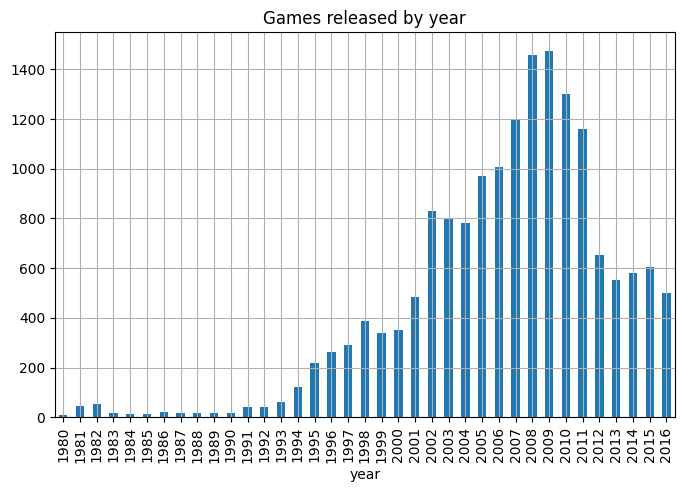

In [73]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', title='Games released by year', grid=True, figsize=(8, 5))
plt.xlabel('year')

Se observa que el período de 2002 a 2012 fue en el que se lanzaron más videojuegos, además es una diferencia bastante grande con respecto al período de 1980 a 2000. Esto probablemente se deba a la aparición de nuevas consolas.

Así, se analizarán las ventas de cada consola para determinar cuales han tenido mayores ganancias desde que fueron lanzadas hasta 2016 (o hasta que fueron descontinuadas).

In [74]:
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_platform.columns = ['total_sales']
sales_by_platform = sales_by_platform.sort_values(by='total_sales', ascending=False).reset_index()
print(sales_by_platform)

   platform  total_sales
0       ps2      1255.76
1      x360       971.42
2       ps3       939.65
3       wii       907.51
4        ds       806.12
5        ps       730.87
6       gba       317.85
7       ps4       314.14
8       psp       294.00
9        pc       259.52
10      3ds       259.00
11       xb       257.74
12       gb       255.46
13      nes       251.05
14      n64       218.68
15     snes       200.04
16       gc       198.93
17     xone       159.32
18     2600        96.98
19     wiiu        82.19
20      psv        54.07
21      sat        33.59
22      gen        28.21
23       dc        15.95
24      scd         2.00
25       ng         1.44
26       ws         1.42
27     tg16         0.16
28      3do         0.10
29       gg         0.04
30     pcfx         0.03


La consola PlayStation 2 encabeza la lista con casi 1,256 millones de dólares en ventas de videojuegos desde que fue lanzada dicha consola. Se analizará el comportamiento a través de los años de las 10 plataformas con mayores ventas totales.

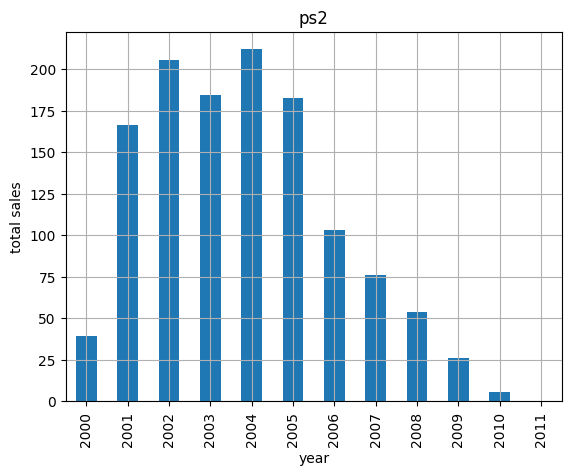

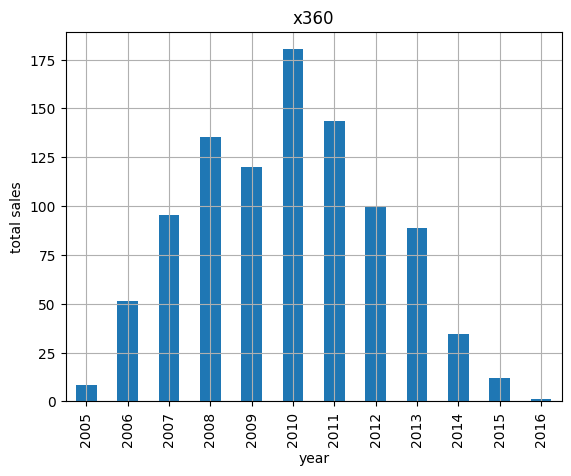

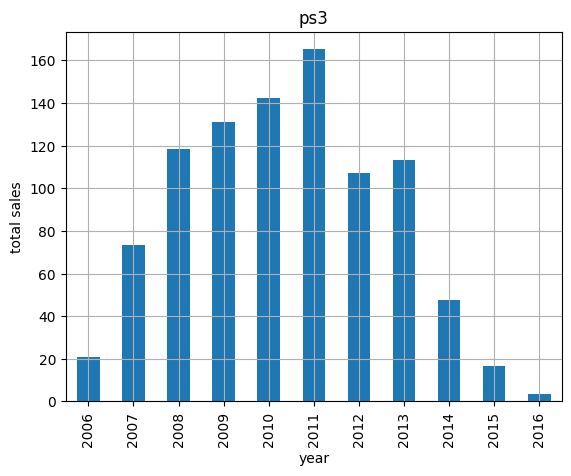

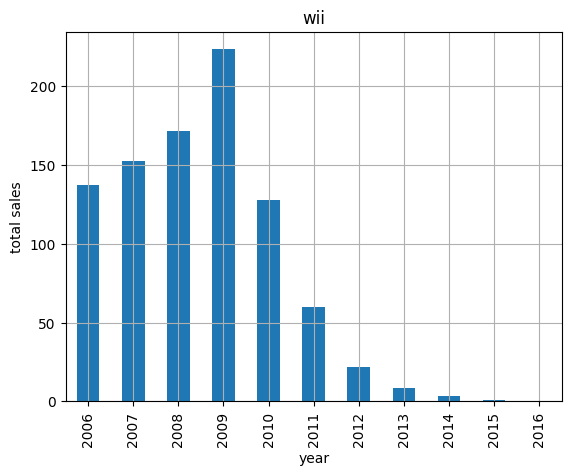

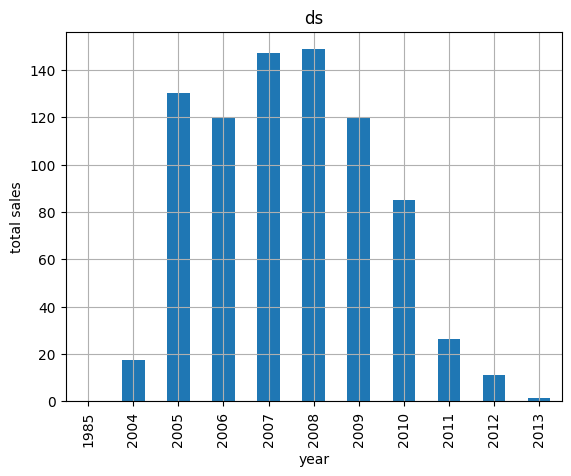

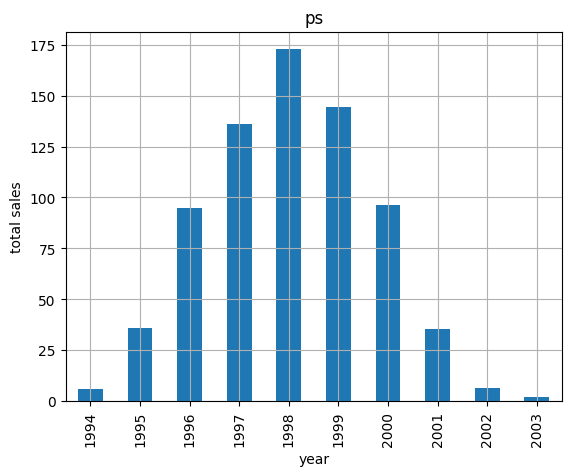

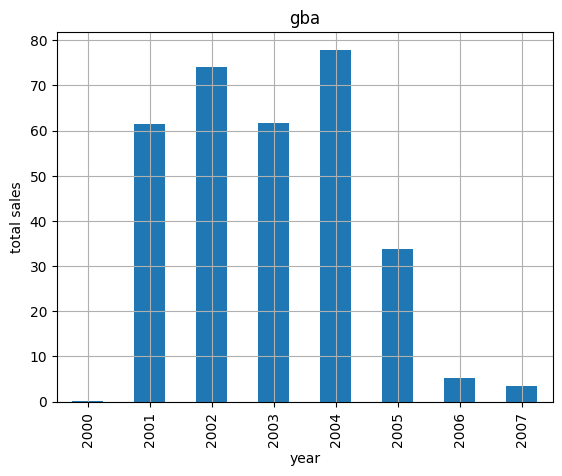

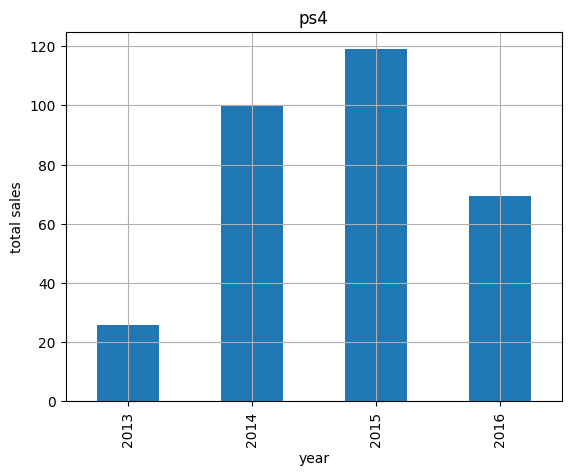

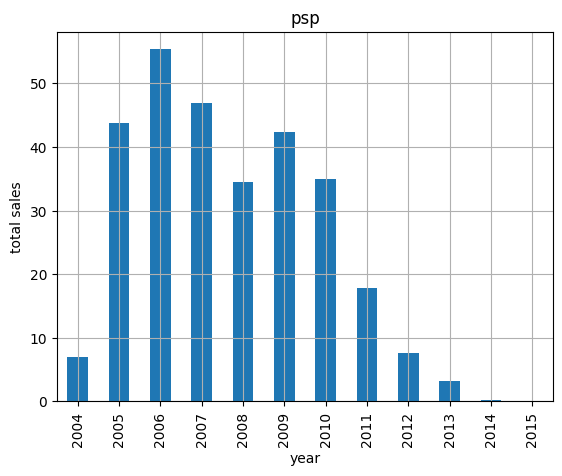

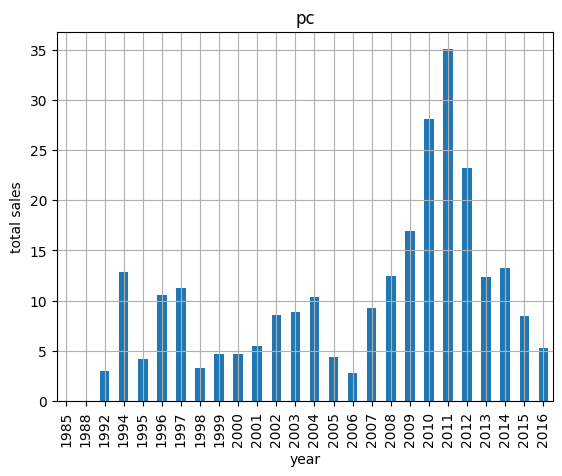

In [75]:
top_10_platforms = sales_by_platform.head(10) #las 10 plataformas con las mejores ventas
for platform_top in top_10_platforms['platform']: #bucle que recorre cada plataforma en la lista de las 10
    plat_slice = df.query('platform == @platform_top') #segmentacion de df por platforma del top 10
    plat_slice.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True)
    plt.ylabel('total sales')
    plt.xlabel('year')
    plt.title(platform_top)
    plt.show()

Salvo la PC, todas las consolas tienen un período de a lo más 11 años en ventas. Los videojuegos para PlayStation 2 encabezan la lista en ventas, sin embargo, no registran ventas desde 2011 y dentro de esta lista existen otras consolas que solían ser populares pero ya no registran ventas:

1. PlayStation 2 (ps2), sin ventas desde 2011.
2. Nintendo DS (ds), sin ventas desde 2013.
3. PlayStation (ps), sin ventas desde 2003.
4. GameBoy Advance (gba), sin ventas desde 2007.
5. PlayStation Portable, sin ventas desde 2015.

Existen otras consolas, que aunque se mantienen con ventas, éstas son muy bajas comparadas con su año de mayor ingreso, no superan 25 millones de dólares por año:

1. Xbox 360 (x360), ventas muy bajas desde 2015.
2. PlayStation 3 (ps3), ventas muy bajas desde 2015.
3. Nintendo Wii (wii), ventas muy bajas desde 2012.

Por otro lado, la consola PlayStation 4 registra ventas desde 2013, el año más fuerte fue 2015 con casi 120 millones de dólares de ingreso y aunque disminuyeron en 2016 a menos de 80 millones, gana por mucho a su predecesora (PlayStation 3) incluso sumando las ventas de los últimos tres años.

Otro punto interesante resulta al comparar las consolas de PlayStation pues la segunda versión fue lanzada en el 2000 y las ventas de la primera consola lanzada en 1994, disminuyeron considerablemente. De manera análoga, la tercera consola fue lanzada en 2006 y las ventas de la segunda disminuyeron, finalmente, la cuarta consola fue lanzada en 2013 y las ventas de la tercera disminuyeron. Por esta razón, se deduce que el período fuerte de una consola son los primeros seis años desde que es lanzada.

[Volver a Contenidos](#back)


### 2.2. Las consolas más rentables <a id='data_analysis_salesplat'></a>

En la sección anterior se obtuvieron las 10 consolas con mayores ventas desde 1980, sin embargo, la mayoría de ellas ya no registran ventas, o registran ventas muy bajas. De hecho, a partir del historial de las consolas de PlayStation, se dedujo que las ventas más fuertes son dentro de los primeros seis años desde el lanzamiento. Por esta razón, se decide filtrar la tabla con videojuegos lanzados como mínimo en 2010, así se cubrirían 7 años (hasta el 2016) para consolas lanzadas en 2010.

El objetivo de esta sección es determinar las plataformas más rentables para el próximo año (2017).

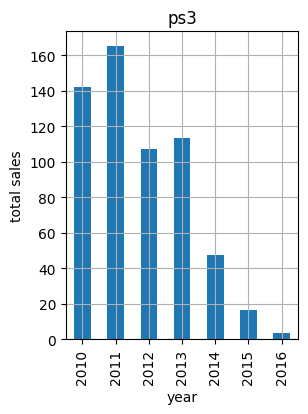

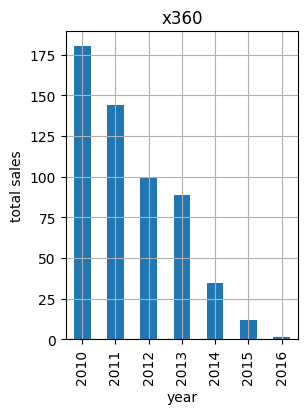

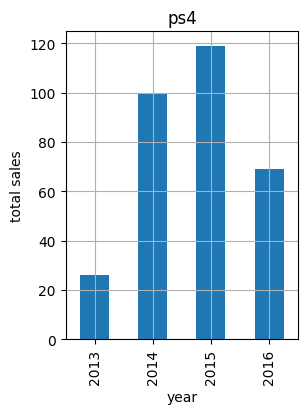

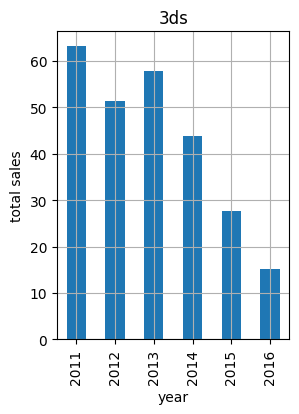

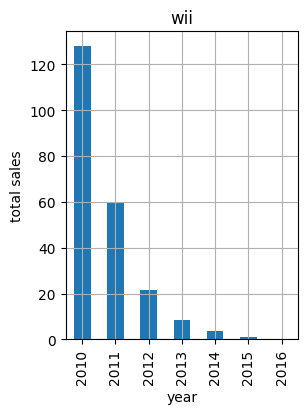

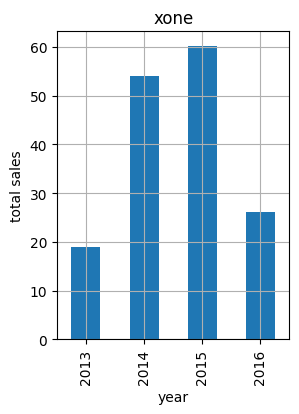

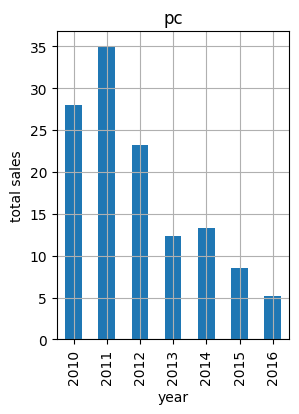

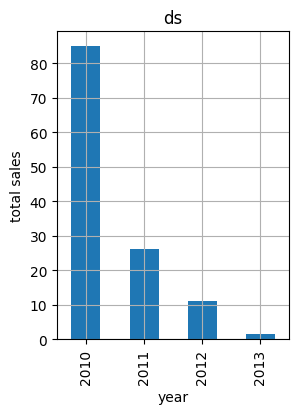

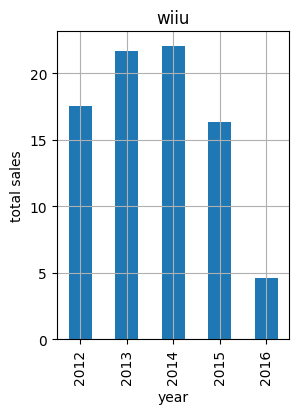

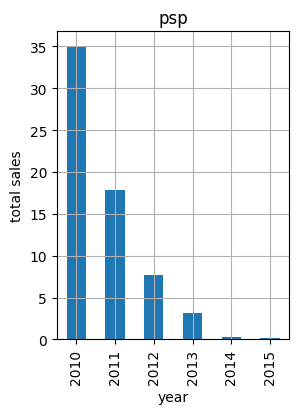

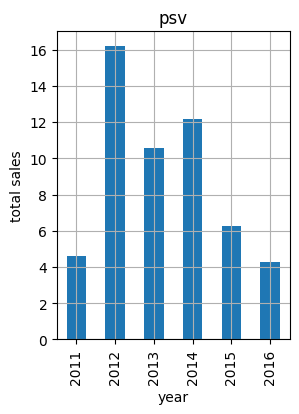

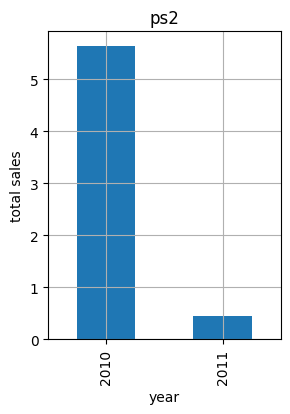

In [76]:
df_2010 = df.query('year_of_release > 2009') #tabla con datos a partir de 2010
sales_by_platform2 = df_2010.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_platform2.columns = ['total_sales']
sales_by_platform2 = sales_by_platform2.sort_values(by='total_sales', ascending=False).reset_index()

for plat in sales_by_platform2['platform']:
    df_plat_slice = df_2010.query('platform == @plat')
    df_plat_slice.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(3, 4))
    plt.ylabel('total sales')
    plt.xlabel('year')
    plt.title(plat)
    plt.show()

En total se tienen 12 consolas. Las consolas que cuentan con 7 años son las que están por desaparecer, estas consolas son:
1. PlayStation 3 (ps3).
2. Xbox 360 (x360).
3. Nintendo Wii (wii).

Los videojuegos para PC, se han mantenido con ventas desde 1980, por ello no se considera esta plataforma en la lista anterior. También se tienen consolas que ya no registran ventas:
1. Nintendo DS (ds).
2. PlayStation Portable (psp).
3. PlayStation 2 (ps2).

Las consolas que tienen seis años registrando ventas desde 2010 (y por ello es probable que aún tengan un año más de ventas considerables) son:
1. Nintendo 3DS (3ds).
2. PlayStation Vita (psv).

Finalmente, las consolas más rentables (es probable que tengan al menos dos años más de ventas) son:
1. PlayStation 4 (ps4).
2. Xbox One (xone).
3. PC.
4. Nintendo Wii U (wiiu).

Se visualizarán las ventas globales de todos los videojuegos para cada una de las consolas (con probabilidad que tengan ventas el año 2017), de esta manera se podrá observar mejor las diferencias o similitudes.

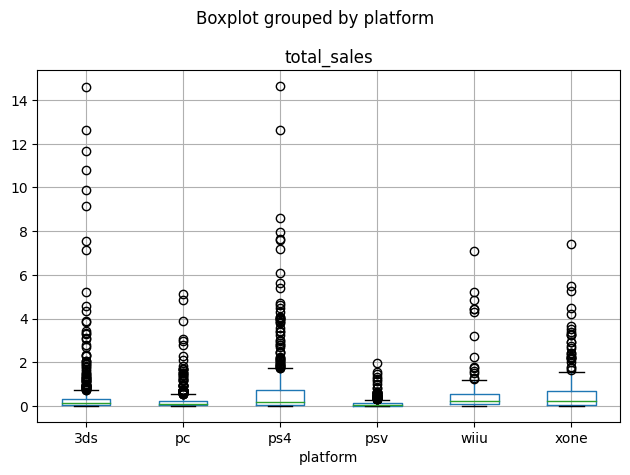

In [77]:
sales_platform = df_2010.query('platform == "3ds" or platform == "psv" or platform == "ps4" or platform == "xone" or platform == "pc" or platform == "wiiu"')

sales_platform.boxplot(column='total_sales', by='platform')
plt.tight_layout()

Dos consolas tienen videojuegos que han superado los 20 millones de dólares en ventas, sin embargo son valores muy atípicos. Para observar las medianas, se imprimirá el gráfico en un rango menor.

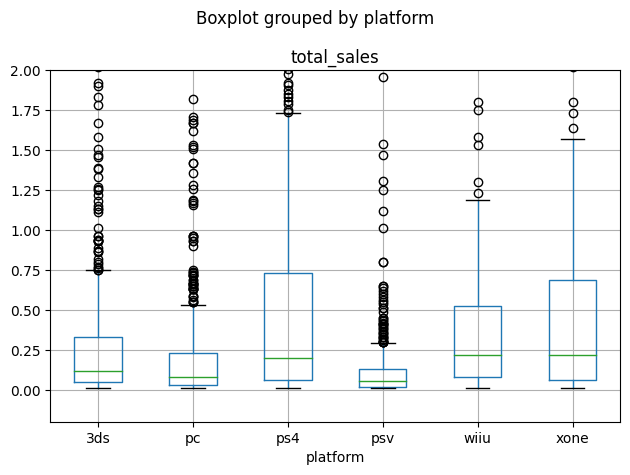

In [78]:
sales_platform.boxplot(column='total_sales', by='platform')
plt.ylim(-0.2,2)
plt.tight_layout()

Las medianas de las consolas PlayStation 4, Nintendo Wii U y Xbox One son muy similares, sin embargo, el PlayStation 4 tienen más videojuegos que superan los 1.5 millones de dólares en ventas. Por otro lado, las medianas de las otras consolas son muy similares, sin embargo es la consola PlayStation Vita la que tiene menores ventas.

Se concluye que las consolas más rentables para el año 2017 son en orden de mayor a menor: PlayStation 4, Xbox One y Nintendo Wii U. En menor medida, las consolas en orden de mayor a menor: Nintendo 3DS, PC y PlayStation Vita.

[Volver a Contenidos](#back)

### 2.3. Puntuación y ventas <a id='data_analysis_rating'></a>

En esta sección se determinará como influyen las puntuaciones de los usuarios y de la crítica profesional a las ventas de los videojuegos. Para ello se estudiará primero dicha correlación con los videojuegos para la consola PlayStation 4.

La correlación de Pearson de las ventas de PS4 con user_score es: -0.04539086100332414
La correlación de Pearson de las ventas de PS4 con critic_score es: 0.33779300922036576


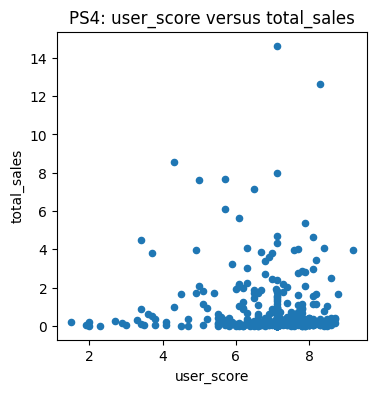

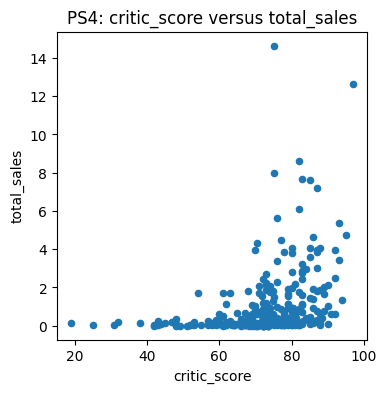

In [79]:
sales_ps4 = df.query('platform == "ps4"')

score_list = ['user_score', 'critic_score']
for score in score_list:
    sales_ps4.plot(x=score, y='total_sales', kind='scatter', figsize=(4, 4))
    plt.title(f'PS4: {score} versus total_sales')
    corr = sales_ps4[score].corr(sales_ps4['total_sales'])
    print(f'La correlación de Pearson de las ventas de PS4 con {score} es: {corr}')

Em ambos casos la correlación de Pearson es muy cerca a 0, sobre todo en el caso de la puntuación de usuarios, lo que indica que no existe una correlación lineal (que no quiere decir que no exista alguna correlación), esto es, la puntuación de los usuarios para un videojuego no influye de manera lineal en las ventas del mismo. En el caso de la puntuación de la crítica, la correlación es un poco más fuerte (y positiva), sin embargo, como es 0.33 que es menor que 0.5 tampoco se puede afirmar que exista una correlación lineal con las ventas de un videojuego.

Se realizará el mismo análisis para las otras dos consolas más rentables: Xbox One y Nintendo Wii U.

La correlación de Pearson de las ventas de xone con user_score es: -0.08957370460604368
La correlación de Pearson de las ventas de xone con critic_score es: 0.33287573668099113
La correlación de Pearson de las ventas de wiiu con user_score es: 0.3472775160170558
La correlación de Pearson de las ventas de wiiu con critic_score es: 0.2803502013269452


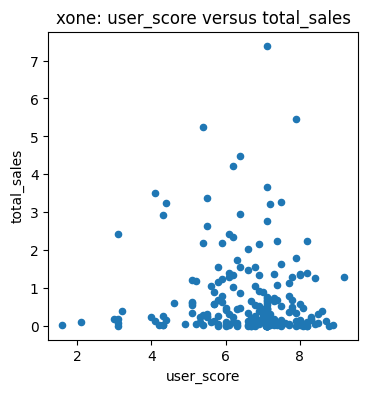

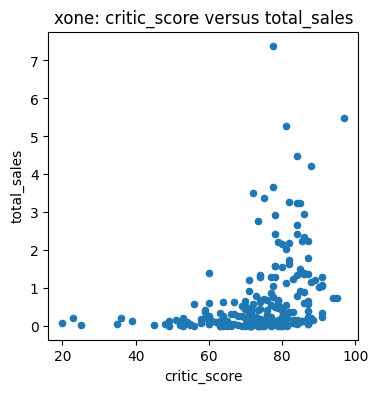

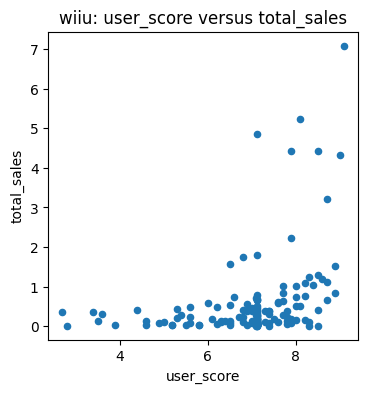

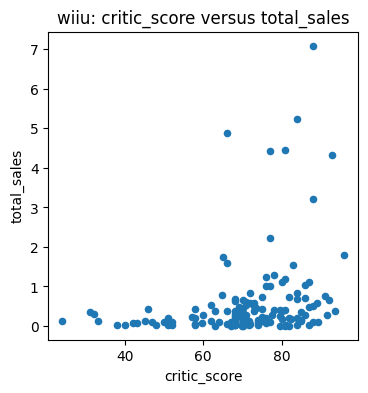

In [80]:
plat_list = ['xone', 'wiiu']
sales = {} #diccionario de segmentos de df
for plat in plat_list: #bucle para segmentar df por plataforma
    sales[plat] = df.query('platform == @plat')
    for score in score_list: #bucle para la gráfica de dispersión y la correlación
        sales[plat].plot(x=score, y='total_sales', kind='scatter', figsize=(4, 4))
        plt.title(f'{plat}: {score} versus total_sales')
        corr = sales[plat][score].corr(sales[plat]['total_sales'])
        print(f'La correlación de Pearson de las ventas de {plat} con {score} es: {corr}')

Los resultados son similares a los obtenidos con la consola PlaySation 4. En conclusión: no existe una correlación lineal entre las puntuaciones de un videojuego (ya sea de usuarios o de critica profesional) y sus ventas.

[Volver a Contenidos](#back)

### 2.4. Género y ventas <a id='data_analysis_rating'></a>

En esta sección se determinarán los géneros de videojuegos más rentables. Se analizarán los datos de la tabla filtrada con videojuegos lanzados a partir de 2010 (`df_2010`).

genre
action          1513
misc             585
sports           584
role-playing     573
adventure        566
Name: name, dtype: int64


Text(0, 0.5, 'quantity')

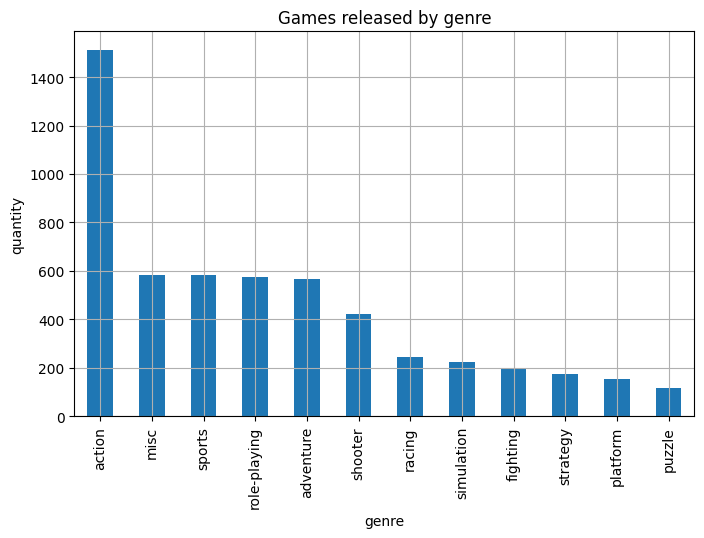

In [81]:
games_genre = df_2010.groupby('genre')['name'].count().sort_values(ascending=False)
print(games_genre.head())

games_genre.plot(kind='bar', title='Games released by genre', grid=True, figsize=(8, 5))
plt.xlabel('genre')
plt.ylabel('quantity')

El género más popular es Acción con más de 1400 videojuegos y existe una gran diferencia con respecto al segundo lugar con un poco menor de 600 que son: misc, deportes, rol y aventura.

Se analizarán las ventas totales de cada videojuego por género.

genre
action          681.00
shooter         483.24
sports          330.69
role-playing    316.05
misc            239.24
Name: total_sales, dtype: float64


Text(0, 0.5, 'millions of dollars')

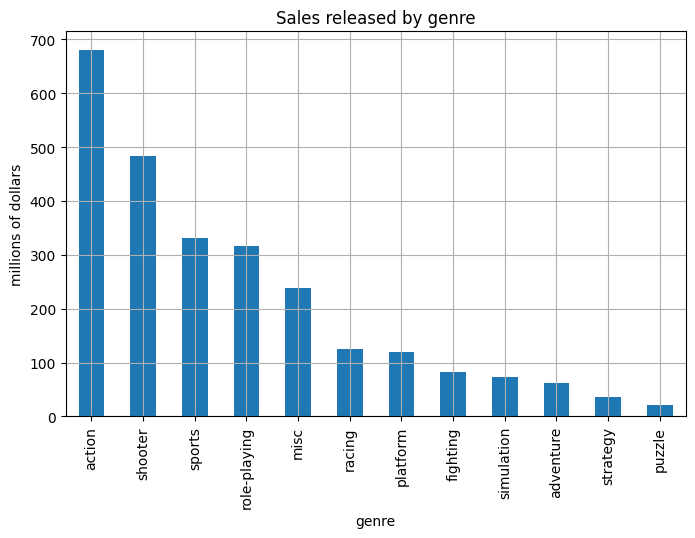

In [82]:
sales_genre = df_2010.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(sales_genre.head())
sales_genre.plot(kind='bar', title='Sales released by genre', grid=True, figsize=(8, 5))
plt.xlabel('genre')
plt.ylabel('millions of dollars')

Nuevamente, los videojuegos de acción encabezan la lista de ventas pero los siguientes lugares se han movido, en segundo lugar están los videojuegos de disparos seguidos por: deportes, rol y misc. Esto corresponde a que los costos de los videojuegos de estos géneros son más altos. Lo que puede indicar que hay una mayor inversión en proceso de desarrollo para cada uno de estos géneros.

[Volver a Contenidos](#back)

### 2.5. Perfil de usuario por región <a id='data_analysis_area'></a>

En esta sección se creará un perfil de usuario para cada región: Norteamérica (na), Europa (eu) y Japón (jp). Primero se determinarán las cinco consolas principales para cada región.

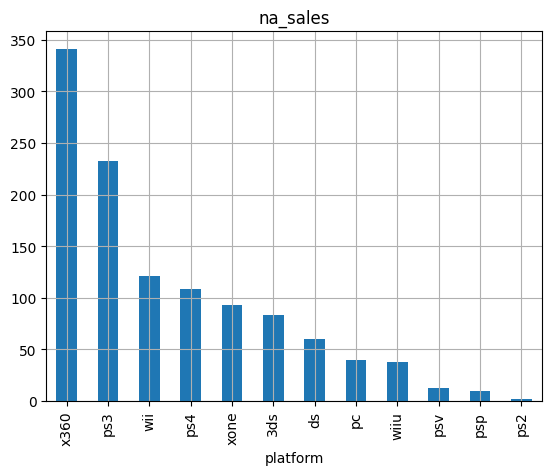

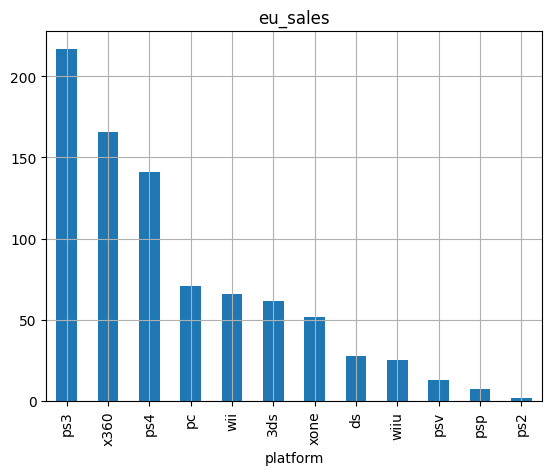

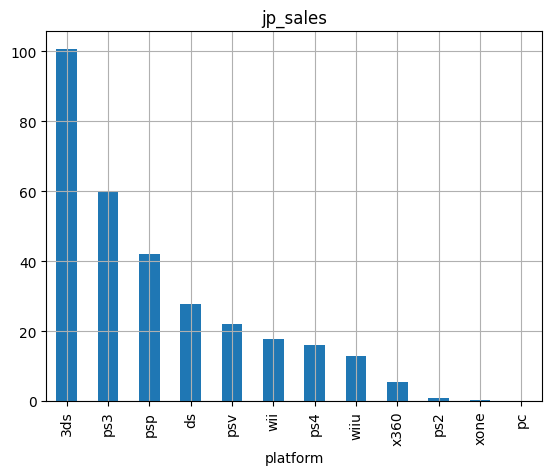

In [83]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    df_2010.groupby('platform')[region].sum().sort_values(ascending=False).plot(kind='bar', title=region, grid=True)
    plt.show()

Se observa que en Norteamérica las cinco consolas con mayores ventas son:

1. Xbox 360.
2. PlayStation 3.
3. Nintendo Wii.
4. PlayStation 4.
5. Xbox One.

En Europa, las cinco consolas con mayores ventas son:

1. PlayStation 3.
2. Xbox 360.
3. PlayStation 4.
4. PC.
5. Nintendo Wii.

En Japón las cinco consolas con mayores ventas son:
1. Nintendo 3DS.
2. PlayStation 3.
3. PlayStation Portable.
4. Nintendo DS.
5. PlayStation Vita.

En Norteamérica y Europa son muy similares las listas de las 5 consolas principales, sólo difieren en una. Sin embargo, en Japón 4 de las cinco consolas son dispositivos portátiles incluyendo el que tiene más ventas. Así, se concluye que los usuarios Japoneses están más interesados en dispositivos portatiles.

Se analizarán los géneros que consumen los usuarios de cada región.

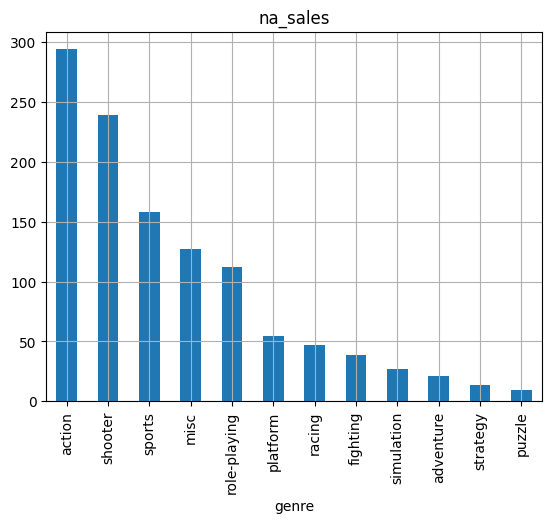

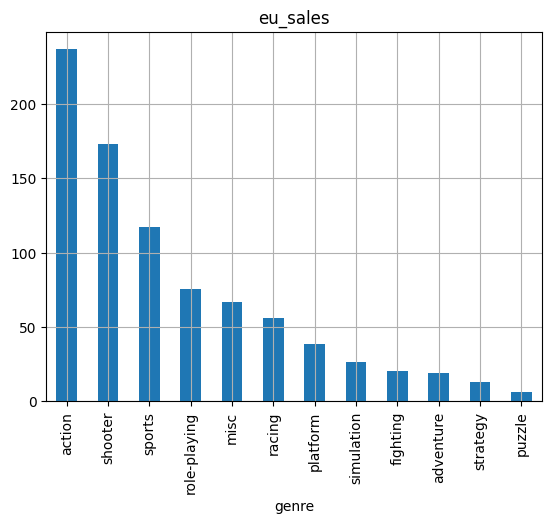

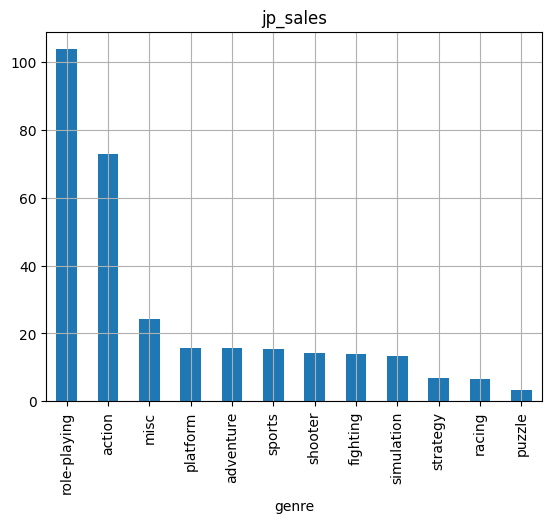

In [84]:
for region in region_list:
    df_2010.groupby('genre')[region].sum().sort_values(ascending=False).plot(kind='bar', title=region, grid=True)
    plt.show()

Los 5 géneros con más ventas en Norteamérica son:

1. Acción.
2. Disparos.
3. Deportes.
4. Misc.
5. Rol.

En Europa son:

1. Acción.
2. Disparos.
3. Deportes.
4. Rol.
5. Misc.

En Japón son:
1. Rol.
2. Acción.
3. Misc.
4. Platform.
5. Adventure.

Se observa nuevamente que los usuarios de Norteamérica y Europa tienen preferencia por los mismos géneros, sin embargo, la lista de Japón es diferente, en primer lugar están los juegos de rol y en segundo lugar los juegos de acción, los cuales son la primera opción de los usuarios en las otras regiones.

Finalmente, se estudiará como afectan las clasificaciones ESRB a las ventas en cada región.

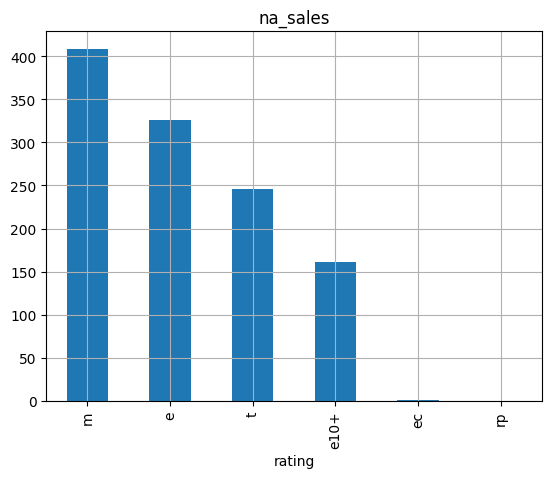

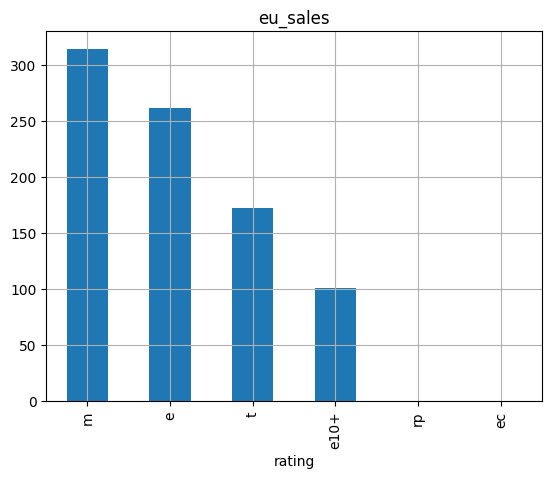

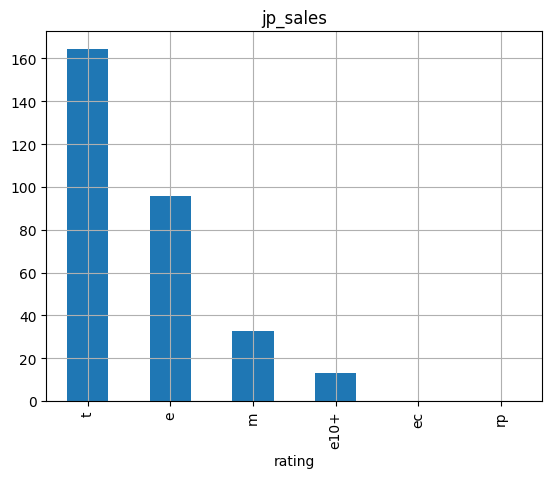

In [85]:
for region in region_list:
    df_2010.groupby('rating')[region].sum().sort_values(ascending=False).plot(kind='bar', title=region, grid=True)
    plt.show()

Tanto en Norteamérica como en Europa, las clasificaciones de los videojuegos que más se consumen son:

1. m - para mayores de 17 años.
2. e - para todo publico.
3. t - para mayores de 13 años.

En Japón, son las mismas tres clasificaciones pero en primer lugar están los videojuegos para mayores de 13 años, en segundo lugar los que son aptos para todo publico y en tercer lugar los que son para mayores de 17 años.

Se concluye que los usuarios de Norteamérica y Europa tienen un perfil muy similar, en ambas regiones se prefieren consolas para el hogar, videojuegos de acción y videojuegos para mayores de 17 años. Mientras que en Japón, los usuarios prefieren consolas portátiles, videojuegos de rol y para mayores de 13 años, lo que indica que probablemente los usuarios de esta región son en su mayoría adolescentes.

[Volver a Contenidos](#back)

### 2.6. Conclusiones <a id='data_analysis_conclusions'></a>

Se determinaron las consolas con mayores ventas desde 1980, sin embargo se observó que muchas de ellas ya no registraban ventas. Analizando cuanto tiempo tardaban en aparecer consolas nuevas y cuanto tiempo continuaba con ventas las anteriores a éstas, se determinó que la vida de una consola con un buen registro de ventas desde su lanzamieto era de 7 años. Así, se analizaron los datos de los videojuegos lanzados como mínimo en el 2010.

A partir de estos datos, las consolas con mayor probabilidad de ventas en 2017 son:
1. PlayStation 4 (ps4).
2. Xbox One (xone).
3. PC.
4. Nintendo Wii U (wiiu).
5. Nintendo 3DS (3ds).
6. PlayStation Vita (psv).

Se analizó la correlación de las puntuaciones de un juego con sus ventas totales y no se encontró una fuerte correlación lineal. De esta manera, las puntuaciones no afectan las ventas (al menos no de manera directa). También se concluye que los videojuegos de acción son los que generan más ingresos, seguidos por los de disparos y deportes.

Finalmente se creó un perfil de usuario por región. En este aspecto, el perfil de los usuarios de Norteamérica y Europa es muy similar: un usuario que prefiere consola para el hogar, mayor de 17 años y videojuegos de acción. Mientras que en Japón, el perfil es: un usuario que prefiere una consola móvil, adolescente (mayor de 13 años) y videojuegos de rol.

[Volver a Contenidos](#back)

## Etapa 4. Comprobación de hipótesis <a id='data_hypothesis'></a>

Se plantearon las siguientes hipótesis:

1. Las puntuaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.

En esta etapa se harán pruebas de hipótesis para comprobarlas.

### 4. 1. Puntuaciones y consolas <a id='data_hypothesis_platform'></a>

Para verificar la primera hipótesis, se estable como hipótesis nula la siguiente:

**H0: Las puntuaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.**

Por lo que la hipótesis alternativa es:

**H1: Las puntuaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.**

Se utilizará la prueba-t con un nivel de significancia estadística del 5%.

Se filtrará la tabla por plataforma y se crearán tablas con los promedios de las puntuaciones de usuario por videojuego.

In [86]:
plat = {}
for platf in ['xone', 'pc']:
    plat[platf] = df_2010.query('platform == @platf')

In [87]:
plat_score = {}
for platf in ['xone', 'pc']:
    plat_score[platf] = plat[platf].pivot_table(index='name', values='user_score')

print(plat_score['xone'].head())
print()
print(plat_score['pc'].head())

                                            user_score
name                                                  
7 days to die                                 5.200000
adventure time: finn & jake investigations    7.125046
agatha christie's the abc murders             7.500000
alien: isolation                              7.800000
angry birds star wars                         6.900000

                                       user_score
name                                             
18 wheels of steel: extreme trucker 2    8.300000
4 play collection - dark mysteries       7.125046
7 roses: a darkness rises                7.125046
[prototype 2]                            6.400000
a game of thrones: genesis               4.000000


Con estas dos tablas se verificará la hipótesis.

In [88]:
alpha = 0.05 #nivel de significancia

results_score = st.ttest_ind(plat_score['xone'], plat_score['pc'], equal_var=True)

print('p-value:', results_score.pvalue)

if results_score.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: [0.84814051]
No rechazamos la hipótesis nula


Con los resultados de esta prueba no se puede concluir que las puntuaciones promedio de los usuarios de Xbox One y PC son distintas.

Se realizará una prueba similar para la siguiente hipótesis planteada.

[Volver a Contenidos](#back)

### 4. 2. Puntuaciones y género <a id='data_hypothesis_genre'></a>

Para verificar la segunda hipótesis, se establece como hipótesis nula la siguiente:

**H0: Las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

Por lo que la hipótesis alternativa es:

**H1: Las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.**

Se utilizará la prueba-t con un nivel de significancia estadística del 5%.

Se filtrará la tabla por género y se crearán tablas con los promedios de las puntuaciones de los usuarios.

In [89]:
genres = {}
for genre in ['action', 'sports']:
    genres[genre] = df_2010.query('genre == @genre')

In [90]:
genre_score = {}
for genre in ['action', 'sports']:
    genre_score[genre] = genres[genre].pivot_table(index='name', values='user_score')

print(genre_score['action'].head())
print()
print(genre_score['sports'].head())

                                     user_score
name                                           
.hack: sekai no mukou ni + versus      7.125046
1001 touch games                       7.125046
3rd super robot wars z: tengoku-hen    7.125046
7 days to die                          5.550000
[prototype 2]                          6.733333

                                  user_score
name                                        
10 minute solution                  7.125046
101-in-1 sports megamix             7.125046
101-in-1 sports party megamix       7.125046
2010 fifa world cup south africa    7.500000
2014 fifa world cup brazil          4.350000


Con estas dos tablas se verificará la hipótesis.

In [91]:
alpha = 0.05 #nivel de significancia

results_score2 = st.ttest_ind(genre_score['action'], genre_score['sports'], equal_var=True)

print('p-value:', results_score2.pvalue)

if results_score2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: [2.27164982e-09]
Rechazamos la hipótesis nula


Con este resultado rechazamos la hipótesis nula, esto es, concluimos que las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.

## Etapa 5. Conclusión general <a id='data_conclusion'></a>

En este estudio se analizaron datos de videojuegos. El objetivo fue identificar patrones para determinar si un videojuego es exitoso o no. De este modo, se estudiaron las ventas de los videojuegos por consola y por género. Se concluyó que existen consolas que fueron muy populares pero que muchas de ellas no registran ventas desde 2013 y se creó una lista con las consolas más rentables para el año 2017.

También se concluyó que los videojuegos de acción son los más exitosos (y que generan más ingresos). Por otro lado, no existe una correlación lineal entre las ventas y las puntuaciones de los videojuegos ya sea por parte de usuarios o de critica profesional. También se creo un perfil de usuario para las regiones de Norteamérica, Europa y Japón, las preferencias de los usuarios japonenes son muy distintas a las de los usuarios de las otras regiones. 

La primera hipótesis planteada fue:
1. Las puntuaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Para veririficar esta hipótesis se hizo una prueba-t con un nivel de significancia del 5%, con lo que se concluyó que no se puede rechazar esta hipótesis.

La segunda hipótesis fue:

2. Las puntuaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.

De la misma manera que con la primera hipótesis, para verificarla se utilizo una prueba-t con nivel de significancia del 5%. El resultado obtenido es que en efecto, las puntuaciones promedio son distintas.

[Volver a Contenidos](#back)